In [12]:
%pip install scikit-learn
%pip install -U langchain-huggingface


Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.decomposition import PCA
from langchain_huggingface import HuggingFaceEmbeddings


In [15]:
# Step 1: Define the embedding model
# Using a HuggingFace model for embeddings in LangChain
embed_model = HuggingFaceEmbeddings(model_name="sentence-transformers/all-MiniLM-L6-v2")


In [16]:
# Generate an embedding for a single sentence
single_embedding = embed_model.embed_query("Embeddings represent text as numerical vectors in AI systems.")
print(single_embedding)
print(f"Single embedding length: {len(single_embedding)}")

[-0.012320983223617077, -0.03862697258591652, -0.00875051598995924, -0.02992289327085018, 0.020843032747507095, 0.024390826001763344, 0.0025231828913092613, 0.023981664329767227, 0.04169027507305145, -0.04870454967021942, -0.027678729966282845, 0.017041416838765144, 0.09081067144870758, 0.027930863201618195, -0.07209678739309311, 0.022370772436261177, 0.058466456830501556, 0.03360388055443764, -0.04406453296542168, -0.02804979868233204, 0.004680298734456301, 0.04793335869908333, -0.02164265885949135, -0.07187563925981522, 0.052199702709913254, 0.08530569076538086, -0.03812335431575775, 0.005716496612876654, 0.03401388227939606, 0.025885554030537605, 0.020634086802601814, -0.01624307967722416, 0.027141690254211426, 0.0370250940322876, -0.06500249356031418, 0.030042894184589386, -0.04198647662997246, -0.010220001451671124, -0.05606650933623314, 0.03828471153974533, 0.0475233718752861, 0.011876937933266163, 0.061720527708530426, 0.04174938425421715, 0.1022975891828537, 0.02892675995826721

In [17]:
print(embed_model.embed_query("Embeddings represent text as numerical vectors in AI systems."))


[-0.012320983223617077, -0.03862697258591652, -0.00875051598995924, -0.02992289327085018, 0.020843032747507095, 0.024390826001763344, 0.0025231828913092613, 0.023981664329767227, 0.04169027507305145, -0.04870454967021942, -0.027678729966282845, 0.017041416838765144, 0.09081067144870758, 0.027930863201618195, -0.07209678739309311, 0.022370772436261177, 0.058466456830501556, 0.03360388055443764, -0.04406453296542168, -0.02804979868233204, 0.004680298734456301, 0.04793335869908333, -0.02164265885949135, -0.07187563925981522, 0.052199702709913254, 0.08530569076538086, -0.03812335431575775, 0.005716496612876654, 0.03401388227939606, 0.025885554030537605, 0.020634086802601814, -0.01624307967722416, 0.027141690254211426, 0.0370250940322876, -0.06500249356031418, 0.030042894184589386, -0.04198647662997246, -0.010220001451671124, -0.05606650933623314, 0.03828471153974533, 0.0475233718752861, 0.011876937933266163, 0.061720527708530426, 0.04174938425421715, 0.1022975891828537, 0.02892675995826721

In [18]:
# Step 2: Define the statements
statements = [
    "The cat is on the mat.",                     # Set 1 - Stmt 1
    "The sun rises in the east.",                 # Unrelated - Stmt 2
    "The feline rests on the carpet.",            # Set 1 - Stmt 3
    "Artificial Intelligence is fascinating.",    # Set 2 - Stmt 4
    "Machine learning drives AI advancements.",   # Set 2 - Stmt 5
    "Birds fly in the sky.",                      # Unrelated - Stmt 6
    "Deep learning is a subset of AI.",           # Set 2 - Stmt 7
    "Cat and Cow are domestic animals",           # Set 1 - Stmt 8
    "Equity, mutual funds and stocks are various options to invest", # Set 3 - Stmt 9
    "Gold can be used as hedge towards the investement", # Set 3 - Stmt 10
    "Nifty and Sensex are major index in India", # Set 3 - Stmt 11
    "Nasdaq, Dow and S&P 100 are major index in India", # Set 3 - Stmt 12
]

In [19]:
# Step 3: Generate embeddings
embeddings = [embed_model.embed_query(statement) for statement in statements]
print(f"Number of embeddings generated: {len(embeddings)}")

Number of embeddings generated: 12


In [20]:

# Step 4: Calculate cosine similarity
similarity_matrix = cosine_similarity(embeddings)

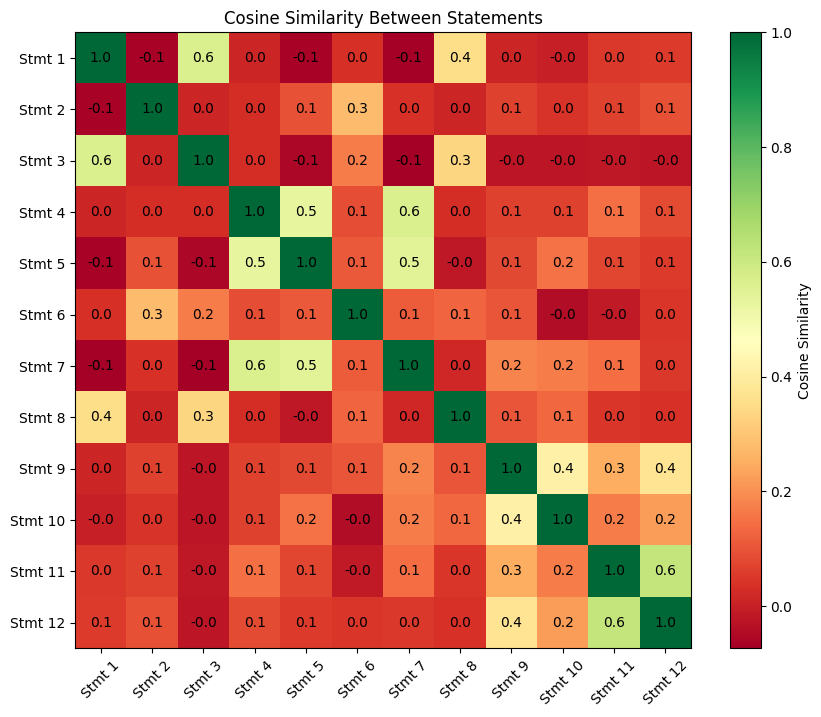

In [23]:
# Step 5: Visualize the similarity matrix
plt.figure(figsize=(10, 8))
# plt.imshow(similarity_matrix, cmap='coolwarm', interpolation='nearest')
plt.imshow(similarity_matrix, cmap='RdYlGn', interpolation='nearest')
plt.colorbar(label='Cosine Similarity')
plt.xticks(range(len(statements)), [f"Stmt {i+1}" for i in range(len(statements))], rotation=45)
plt.yticks(range(len(statements)), [f"Stmt {i+1}" for i in range(len(statements))])

# Add the similarity values as text in each box
for i in range(similarity_matrix.shape[0]):
    for j in range(similarity_matrix.shape[1]):
        plt.text(j, i, f"{similarity_matrix[i, j]:.1f}", 
                 ha='center', va='center', color='black')



plt.title("Cosine Similarity Between Statements")
plt.show()

In [10]:
# Step 6: Analyze relationships in 2D using PCA
pca = PCA(n_components=2)
reduced_embeddings = pca.fit_transform(embeddings)

In [ ]:
# Scatter plot to visualize relationships
plt.figure(figsize=(8, 6))
for i, (x, y) in enumerate(reduced_embeddings):
    plt.scatter(x, y, label=f"Stmt {i+1}")
    plt.text(x + 0.02, y, f"Stmt {i+1}", fontsize=9)

plt.title("Statement Relationships (PCA Reduced)")
plt.xlabel("PCA Dimension 1")
plt.ylabel("PCA Dimension 2")
plt.legend()
plt.grid()
plt.show()

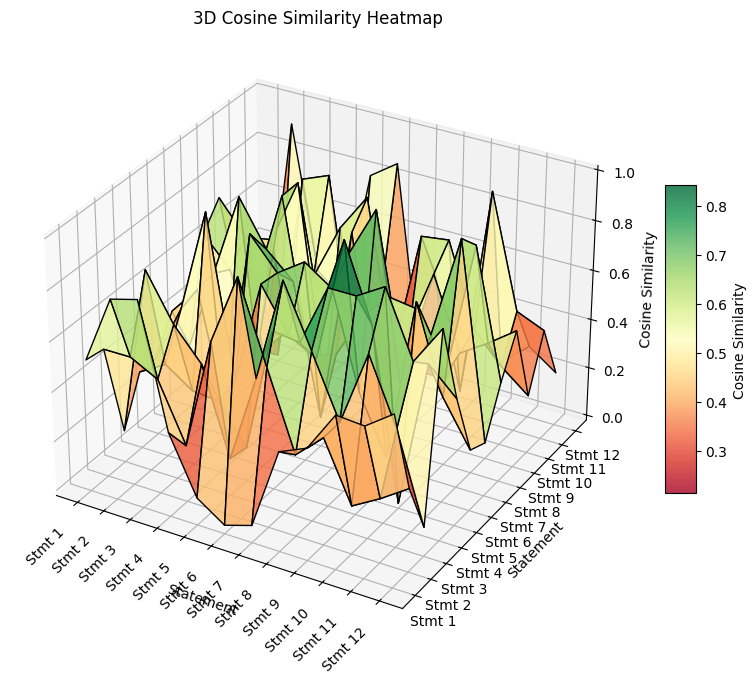

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation

# Example similarity matrix (replace with your actual data)
similarity_matrix = np.random.rand(12, 12)  # Replace this with your actual similarity matrix

# Statements (x and y labels)
statements = [f"Stmt {i+1}" for i in range(similarity_matrix.shape[0])]

# Create a meshgrid for plotting
x, y = np.meshgrid(range(similarity_matrix.shape[0]), range(similarity_matrix.shape[1]))
z = similarity_matrix

# Set up the figure and 3D axis
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the surface
surf = ax.plot_surface(x, y, z, cmap='RdYlGn', edgecolor='k', alpha=0.8)

# Add colorbar
cbar = fig.colorbar(surf, ax=ax, shrink=0.5, aspect=10)
cbar.set_label("Cosine Similarity")

# Add axis labels
ax.set_xticks(range(len(statements)))
ax.set_xticklabels(statements, rotation=45, ha='right')
ax.set_yticks(range(len(statements)))
ax.set_yticklabels(statements)
ax.set_xlabel("Statement")
ax.set_ylabel("Statement")
ax.set_zlabel("Cosine Similarity")
ax.set_title("3D Cosine Similarity Heatmap")

# Animate the 3D rotation
def update(frame):
    ax.view_init(30, frame)  # Rotate elevation to 30 degrees, azimuth dynamically changes

ani = FuncAnimation(fig, update, frames=np.arange(0, 360, 2), interval=50)  # 360-degree rotation

# Show the plot (dynamic rotation)
plt.show()
